### Crime Cases Analysis in Socioeconomically Disadvantaged Areas of Chicago

In [1]:
import pandas as pd
import geopandas as gpd
import folium
from folium import Choropleth

merged_3Datasets = pd.read_csv("mergedAll/merged_3.csv")

# Load the GeoJSON file for the police districts 
# downloadedat: https://data.cityofchicago.org/resource/9vmg-9p8p.geojson
# site: https://data.cityofchicago.org/Public-Safety/PoliceDistrict/9vmg-9p8p/about_data
police_districts_geo = gpd.read_file("Chicago_Police_Districts.geojson")


# can be dowloaded from https://data.cityofchicago.org/resource/2ui7-wiq8.json  
# site: https://data.cityofchicago.org/Community-Economic-Development/Socioeconomically-Disadvantaged-Areas/2ui7-wiq8/about_data
disadvantaged_areas = gpd.read_file("Socioeconomically Disadvantaged Areas.geojson")

In [2]:
police_districts_geo.head()

dist_label dist_num                                           geometry
0       18TH       18  MULTIPOLYGON (((-87.63068 41.92623, -87.6296 4...
1       13TH       13  MULTIPOLYGON (((-87.65742 41.90351, -87.65739 ...
2       11TH       11  MULTIPOLYGON (((-87.70679 41.90283, -87.70679 ...
3       12TH       12  MULTIPOLYGON (((-87.64111 41.88907, -87.6411 4...
4       24TH       24  MULTIPOLYGON (((-87.67424 42.023, -87.66541 42...

## Visualize Socio-economically Disadvantaged Areas

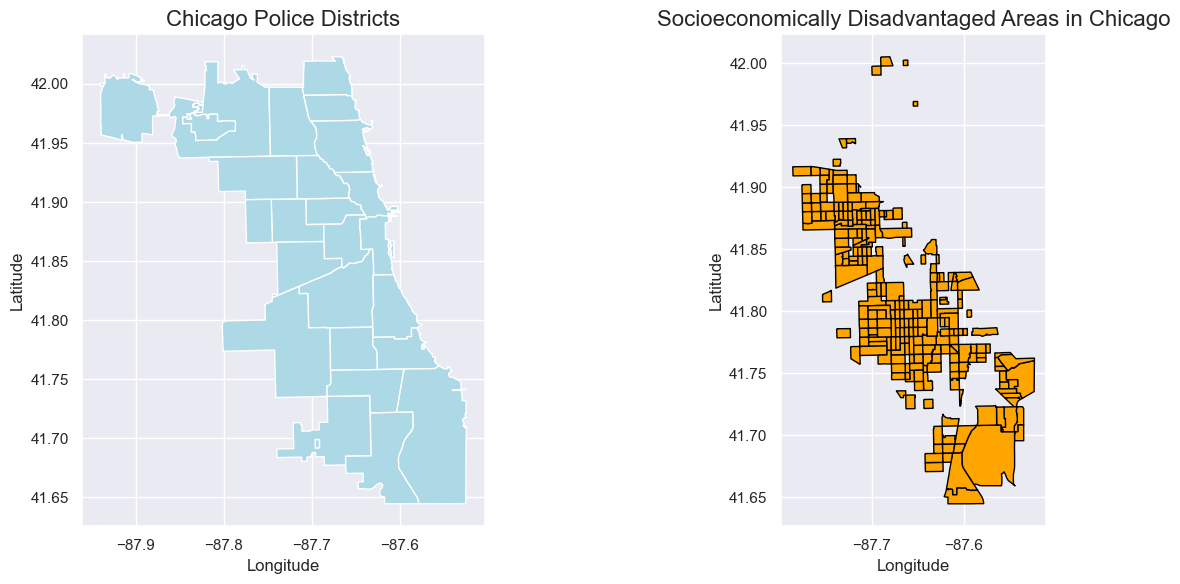

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

# Load the GeoJSON files
police_districts_geo = gpd.read_file("Chicago_Police_Districts.geojson")
disadvantaged_areas = gpd.read_file("Socioeconomically Disadvantaged Areas.geojson")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the Chicago Police Districts
police_districts_geo.plot(ax=axes[0], color="lightblue", edgecolor="white")
axes[0].set_title("Chicago Police Districts", fontsize=16)
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Plot the Socioeconomically Disadvantaged Areas
disadvantaged_areas.plot(ax=axes[1], color="orange", edgecolor="black")
axes[1].set_title("Socioeconomically Disadvantaged Areas in Chicago", fontsize=16)
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")


plt.tight_layout()
plt.savefig("imgs/Chicago_Police_Districts_and_Disadvantaged_Areas.jpg", dpi=300, bbox_inches='tight')


plt.show()

In [4]:
def change_column_dtype(dataframes, column, dtype=str):
    """
    Change the data type of a specified column 
    """
    for name, df in dataframes.items():
        if column in df.columns:
            df[column] = df[column].astype(dtype)
    return dataframes

def merge_with_geo(geo_df, dataframes, geo_col='dist_num', data_col='district'):
    """
    Merge a GeoDataFrame with multiple DataFrames on specified columns
    """
    merged = {}
    for name, df in dataframes.items():
        merged[name] = geo_df.set_index(geo_col).join(df.set_index(data_col))
    return merged


# import previously aggregated data
arrestcount_byDistrict = pd.read_csv("aggregatedData/categoriaclAggregation_1/arrestcount_byDistrict.csv") #
top_felony_districts = pd.read_csv("aggregatedData/categoriaclAggregation_1/top_felony_districts.csv")    #
top_misdemenor_districts = pd.read_csv("aggregatedData/categoriaclAggregation_1/top_misdemenor_districts.csv") #

crime_count_by_race_sorted = pd.read_csv("aggregatedData/categoriaclAggregation_2/crime_count_by_race_sorted.csv")
top15_crimeSpots = pd.read_csv("aggregatedData/categoriaclAggregation_2/top15_crimeSpots.csv")
top15_crimeTypes = pd.read_csv("aggregatedData/categoriaclAggregation_2/top15_crimeTypes.csv")



avg_hardship_by_district = pd.read_csv("aggregatedData/indicatorAggregations/avg_hardship_by_district.csv")   #
avg_percapita_by_district = pd.read_csv("aggregatedData/indicatorAggregations/avg_percapita_by_district.csv") #
avg_percent_aged_25_without_high_school_diploma = pd.read_csv("aggregatedData/indicatorAggregations/avg_percent_by_district.csv") #


average_poverty_by_district = merged_3Datasets.groupby('district')['percent_households_below_poverty'].mean().reset_index()  #
avgerage_percent_aged_16_unemployed = merged_3Datasets.groupby('district')['percent_aged_16_unemployed'].mean().reset_index() #

# List of DataFrames to process
dataframes = {
    "arrestcount_byDistrict": arrestcount_byDistrict,
    "avg_percapita_by_district": avg_percapita_by_district,
    "top_felony_districts": top_felony_districts,
    "top_misdemenor_districts": top_misdemenor_districts,
    "avg_hardship_by_district": avg_hardship_by_district,
    "average_poverty_by_district": average_poverty_by_district,
    "avgerage_percent_aged_16_unemployed": avgerage_percent_aged_16_unemployed,
    "avg_percent_aged_25_without_high_school_diploma": avg_percent_aged_25_without_high_school_diploma,
}

# Change column data type
dataframes = change_column_dtype(dataframes, column='district')

# Merge with GeoDataFrame
merged_datasets = merge_with_geo(police_districts_geo, dataframes)

# Access merged GeoDataFrames
ArrestCounts_ByDistrict = merged_datasets["arrestcount_byDistrict"]
AvgHarship_ByDistrict = merged_datasets["avg_hardship_by_district"]
AvgPercapita_ByDistrict = merged_datasets["avg_percapita_by_district"]
Average_poverty_by_district = merged_datasets["average_poverty_by_district"]
avgerage_percent_aged_16_unemployed = merged_datasets["avgerage_percent_aged_16_unemployed"]
avg_percent_aged_25_without_high_school_diploma_district = merged_datasets["avg_percent_aged_25_without_high_school_diploma"]

/var/folders/4v/4nsnz5ks1398nw00fy4kq0300000gn/T/ipykernel_48920/3545673655.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(data.geometry.centroid.x, data.geometry.centroid.y, data['dist_label']):
/var/folders/4v/4nsnz5ks1398nw00fy4kq0300000gn/T/ipykernel_48920/3545673655.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(data.geometry.centroid.x, data.geometry.centroid.y, data['dist_label']):
/var/folders/4v/4nsnz5ks1398nw00fy4kq0300000gn/T/ipykernel_48920/3545673655.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



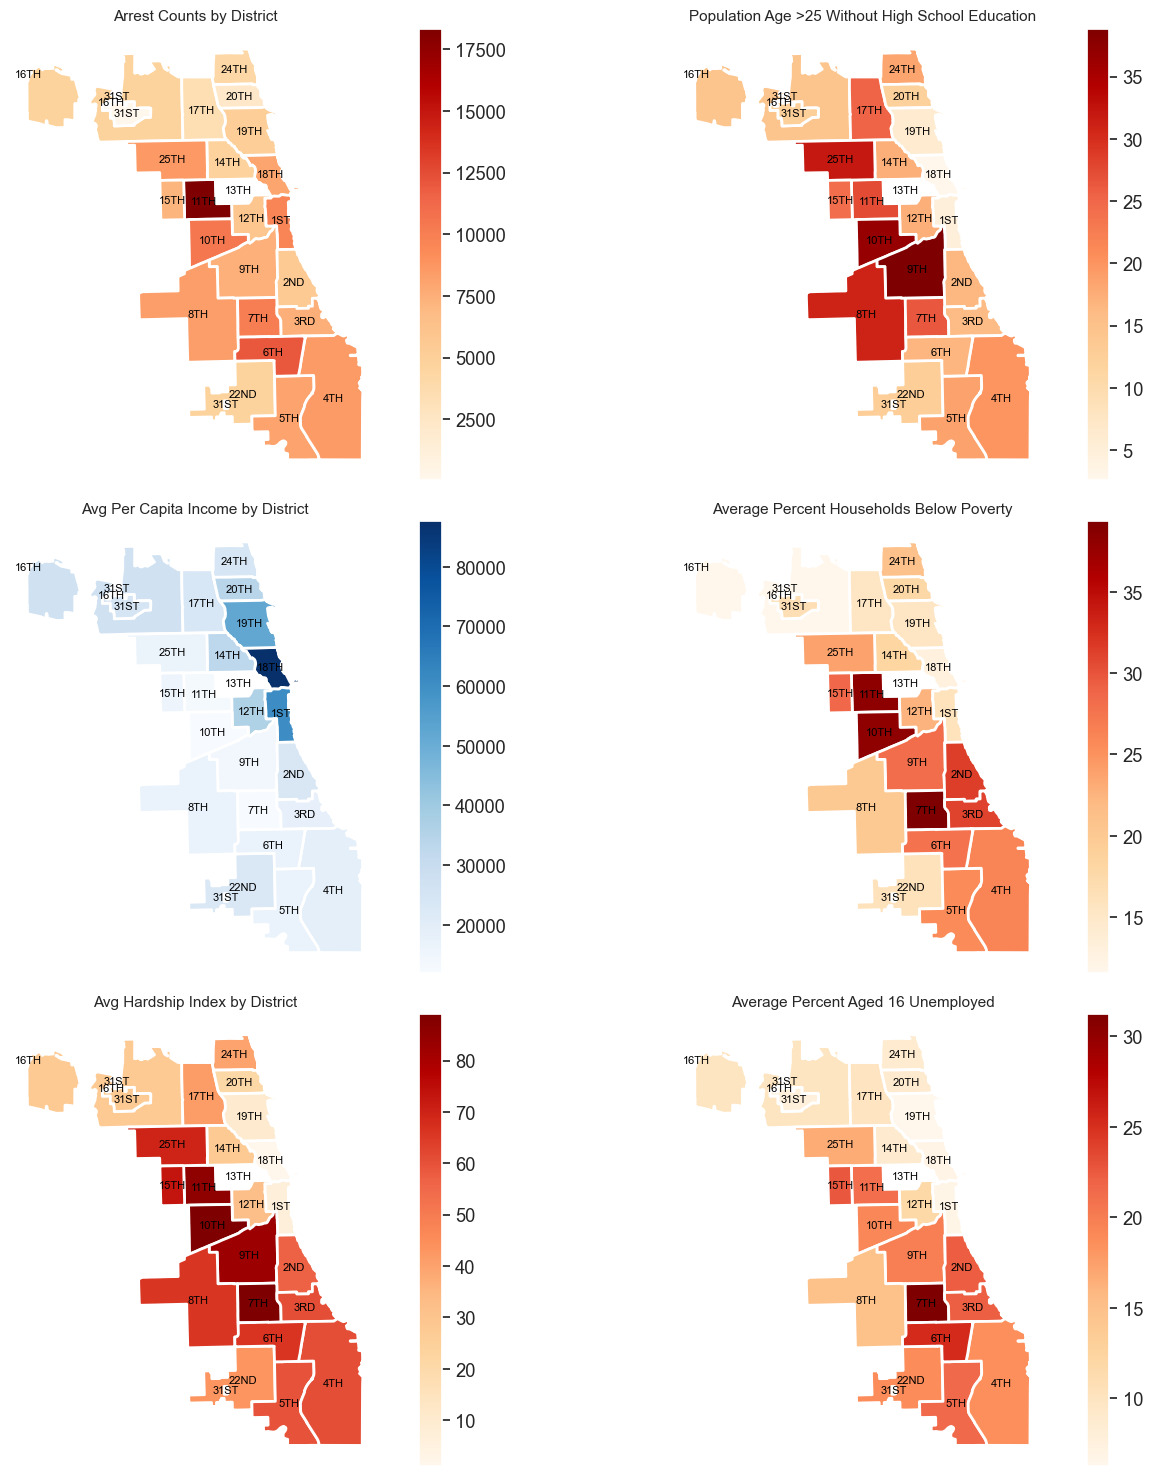

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap_on_axis(ax, data, column, title, cmap='Blues', save_path=None, border_thickness=2):
    sns.set(style='darkgrid', palette='muted', font_scale=1.2)
    data.plot(
        column=column,
        ax=ax,
        legend=True,
        cmap=cmap,
        missing_kwds={"color": "white"},
        edgecolor='white',  # Adjust the edge color for borders
        linewidth=border_thickness  # Set border thickness
    )
    ax.set_title(title, fontdict={'fontsize': 11, 'fontweight': 3})
    for x, y, label in zip(data.geometry.centroid.x, data.geometry.centroid.y, data['dist_label']):
        ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
    ax.set_axis_off()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

plot_heatmap_on_axis(
    axes[0], ArrestCounts_ByDistrict, 'arrest_count', 'Arrest Counts by District', 
    cmap='OrRd', border_thickness=2
)

plot_heatmap_on_axis(
    axes[1], avg_percent_aged_25_without_high_school_diploma_district, 
    'avg_percent_aged_25_without_high_school_diploma', 
    'Population Age >25 Without High School Education', 
    cmap='OrRd', border_thickness=2
)

plot_heatmap_on_axis(
    axes[2], AvgPercapita_ByDistrict, 'avg_per_capita_income_', 
    'Avg Per Capita Income by District', 
    cmap='Blues', border_thickness=2
)

plot_heatmap_on_axis(
    axes[3], Average_poverty_by_district, 'percent_households_below_poverty', 
    'Average Percent Households Below Poverty', 
    cmap='OrRd', border_thickness=2
)

plot_heatmap_on_axis(
    axes[4], AvgHarship_ByDistrict, 'avg_hardship_index', 
    'Avg Hardship Index by District', 
    cmap='OrRd', border_thickness=2
)

plot_heatmap_on_axis(
    axes[5], avgerage_percent_aged_16_unemployed, 'percent_aged_16_unemployed', 
    'Average Percent Aged 16 Unemployed', 
    cmap='OrRd', border_thickness=2
)

for ax in axes[6:]:
    fig.delaxes(ax)

fig.savefig("imgs/heatmap_of_six.jpg", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [6]:
import folium
import geopandas as gpd

# Load GeoJSON files
police_districts_geo = gpd.read_file("Chicago_Police_Districts.geojson")
disadvantaged_areas = gpd.read_file("Socioeconomically Disadvantaged Areas.geojson")

# Ensure CRS compatibility
if police_districts_geo.crs != disadvantaged_areas.crs:
    disadvantaged_areas = disadvantaged_areas.to_crs(police_districts_geo.crs)

# Create the base map
m = folium.Map(location=[41.8781, -87.6298], zoom_start=10.5)  # Chicago coordinates




# Add the police districts layer 
folium.GeoJson(police_districts_geo).add_to(m)


# police districts csustom layer color
# folium.GeoJson(
#     police_districts_geo,
#     name="Police Districts",
#     style_function=lambda x: {'fillColor': 'grey', 'color': 'grey', 'weight': 1.5, 'fillOpacity': 0.3}
# ).add_to(m)

# Add the disadvantaged areas layer with orange color
folium.GeoJson(
    disadvantaged_areas,
    name="Disadvantaged Areas",
    style_function=lambda x: {'fillColor': 'orange', 'color': 'yellow', 'weight': 1, 'fillOpacity': 0.4}
).add_to(m)

# Add district labels
for _, district in police_districts_geo.iterrows():
    # Get the centroid of the district
    centroid = district.geometry.centroid
    # Extract the district label
    district_label = district['dist_label']
    # Create a marker with the label as a popup that is always visible
    marker = folium.Marker(
        location=[centroid.y, centroid.x]
    )
    # Add a Popup and keep it always open
    marker.add_child(folium.Popup(district_label, parse_html=True, max_width=10))
    marker.add_to(m)

# Add a layer control to toggle between layers
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save("imgs/police_and_disadvantaged_areas_map_with_labels_always_visible.html")
m

## Categorical Analysis

In [7]:
import plotly.express as px

def plot_bar_chart(
    data, 
    x_column, 
    y_column, 
    title="Bar Chart", 
    xaxis_title="X Axis", 
    yaxis_title="Y Axis", 
    color_column=None, 
    color_scale='Blues', 
    text_column=None, 
    labels=None, 
    save_path=None, 
    x_tick_angle=-90,
    show_plot=True,  # Added parameter to control plot display
    width=800,       # Default width for the saved image
    height=600       # Default height for the saved image
):
    """
    Creates a customizable bar plot using Plotly Express.

    Returns:
    - A Plotly figure object.
    """
    # Create the bar plot
    fig = px.bar(
        data, 
        x=x_column, 
        y=y_column, 
        title=title, 
        labels=labels, 
        color=color_column, 
        color_continuous_scale=color_scale, 
        text=text_column  # Show text on the bars if text_column is provided
    )

    # Customize layout for better readability
    fig.update_layout(
        xaxis_tickangle=x_tick_angle,  # Rotate x-axis labels for better readability
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        plot_bgcolor='white',  # Set background color to white
    )

    # Optionally, save the plot as a static image with specified dimensions
    if save_path:
        fig.write_image(save_path, width=width, height=height)

    return fig

In [8]:
# arrest counts
plot_bar_chart(
    arrestcount_byDistrict, 
    x_column='district', 
    y_column='arrest_count', 
    title='Arrest Counts by District', 
    xaxis_title="District", 
    yaxis_title="Arrest Count", 
    color_column='arrest_count', 
    color_scale='reds', 
    text_column='arrest_count', 
    save_path="imgs/arrest_counts_by_district_plotly.png"
)

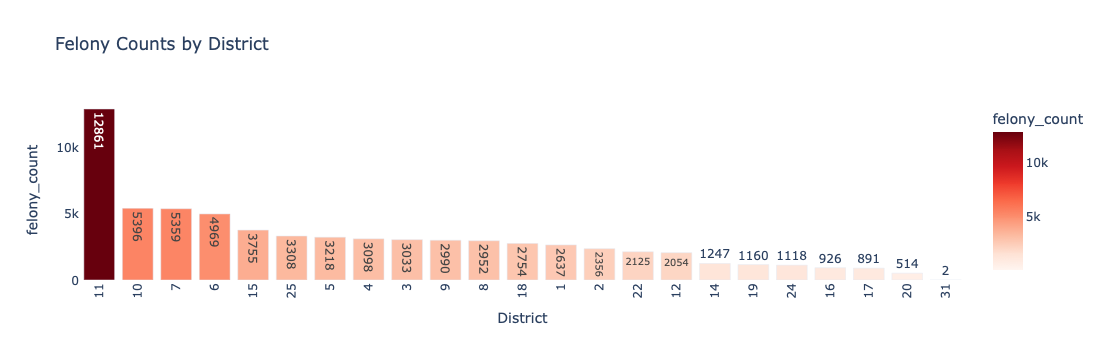

In [9]:
# top felony districts
plot_bar_chart(
    top_felony_districts, 
    x_column='district', 
    y_column='felony_count', 
    title='Felony Counts by District', 
    xaxis_title="District", 
    yaxis_title="felony_count", 
    color_column='felony_count', 
    color_scale='reds', 
    text_column='felony_count', 
    save_path="imgs/Felony_counts_by_district_plotly.png"
)

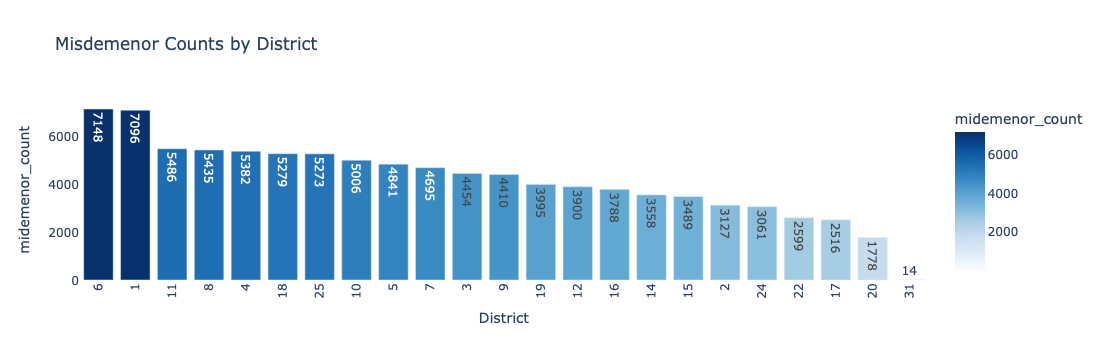

In [10]:
# top misdemenor districts
plot_bar_chart(
    top_misdemenor_districts, 
    x_column='district', 
    y_column='midemenor_count', 
    title='Misdemenor Counts by District', 
    xaxis_title="District", 
    yaxis_title="midemenor_count", 
    color_column='midemenor_count', 
    color_scale='Blues', 
    text_column='midemenor_count', 
    save_path="imgs/arrest_counts_by_district_plotly.png"
)

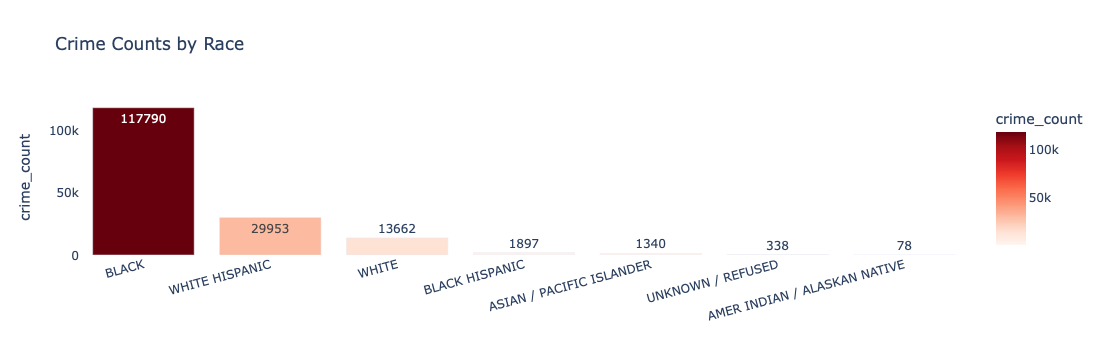

In [11]:
# crime and race
plot_bar_chart(
    crime_count_by_race_sorted, 
    x_column='race', 
    y_column='crime_count', 
    title='Crime Counts by Race', 
    xaxis_title="", 
    yaxis_title="crime_count", 
    color_column='crime_count', 
    color_scale='reds', 
    text_column='crime_count', 
    x_tick_angle=-15,
    save_path="imgs/crime_count_by_race_bar_plotly.png"
)

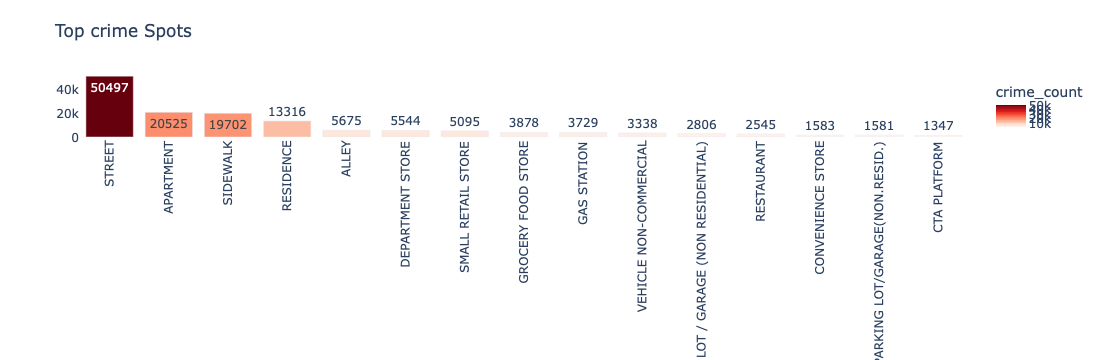

In [12]:
# top crime spots
plot_bar_chart(
    top15_crimeSpots, 
    x_column='location_description', 
    y_column='crime_count', 
    title='Top crime Spots', 
    xaxis_title="", 
    yaxis_title="", 
    color_column='crime_count', 
    color_scale='reds', 
    text_column='crime_count', 
    x_tick_angle=-90,
    width=800,      
    height=1800,
    save_path="imgs/crime_count_by_race_bar_plotly.png"
)

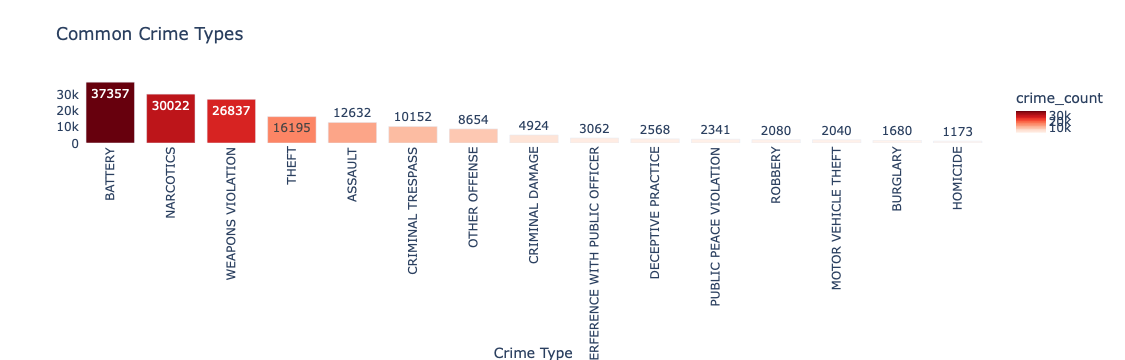

In [13]:
# top crime types
plot_bar_chart(
    top15_crimeTypes, 
    x_column='primary_type', 
    y_column='crime_count', 
    title='Common Crime Types', 
    xaxis_title="Crime Type", 
    yaxis_title="", 
    color_column='crime_count', 
    color_scale='reds', 
    text_column='crime_count', 
    x_tick_angle=-90,
    save_path="imgs/crime_count_by_race_bar_plotly.png"
)